In [36]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import random
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

In [6]:
data_dir = './data/subset_homework'
class_names = os.listdir(data_dir)
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

class_counts

{'class_id_1': 2250, 'class_id_0': 2220}

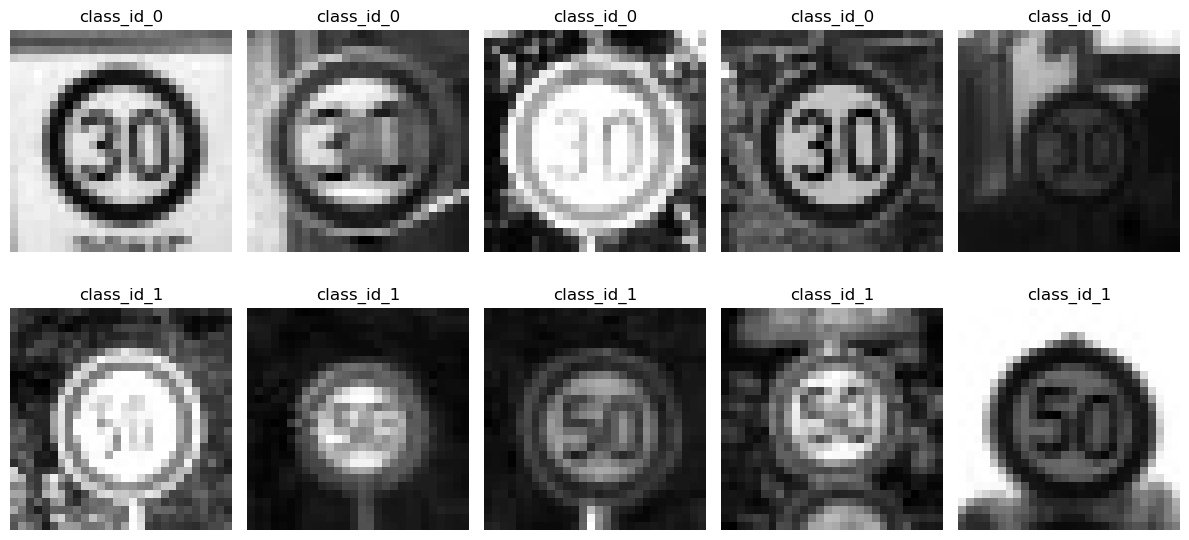

In [15]:
classes_to_visualize = ['class_id_0', 'class_id_1']  # Replace with the actual class names

# Create a grid for displaying images
num_rows = len(classes_to_visualize)  # Number of rows based on the number of classes
num_cols = 5  # Number of columns in the grid

# Create a Matplotlib figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Loop through each class and display images
for row, class_name in enumerate(classes_to_visualize):
    # List all image files for the current class
    class_images = [f for f in os.listdir(os.path.join(data_dir, class_name)) if f.endswith('.jpg')]
    
    # Select a random sample of images from the class
    selected_images = random.sample(class_images, num_cols)
    
    for col, image_file in enumerate(selected_images):
        ax = axes[row, col]

        # Load and display the image using PIL (Pillow)
        img_path = os.path.join(data_dir, class_name, image_file)
        img = Image.open(img_path)
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(class_name)  # Display the class name as the title

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# Initialize empty lists to store image file paths and labels
image_file_paths = []
labels = []

# Loop through each class directory in the data_dir
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    
    # Ensure it's a directory
    if os.path.isdir(class_path):
        # Loop through image files in the class directory
        for image_filename in os.listdir(class_path):
            # Check if the file is an image (you can customize the condition)
            if image_filename.endswith('.jpg'):
                # Construct the full file path
                image_path = os.path.join(class_path, image_filename)
                
                # Append the file path to the list
                image_file_paths.append(image_path)
                
                # Append the label (class name) to the labels list
                labels.append(class_name)

In [39]:
# Load and preprocess the images
images = []
for image_path in image_file_paths:
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    image = tf.keras.preprocessing.image.img_to_array(image)
    image /= 255.0  # Normalize pixel values to be between 0 and 1
    images.append(image)

# Convert lists to numpy arrays
X_data = np.array(images)
y_data = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Encode class labels (if needed)
# If your labels are already in binary format (0 or 1), you can skip this step
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [40]:
# Define your model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 input images
    layers.Dense(1, activation='sigmoid')  # Single neuron for binary classification
])

# Use binary_crossentropy loss for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
90/90 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5442 - val_loss: 0.6630 - val_accuracy: 0.5880
Epoch 2/10
90/90 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6311 - val_loss: 0.6212 - val_accuracy: 0.6830
Epoch 3/10
90/90 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.6808 - val_loss: 0.5904 - val_accuracy: 0.7137
Epoch 4/10
90/90 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7181 - val_loss: 0.5686 - val_accuracy: 0.7486
Epoch 5/10
90/90 [==============================] - 0s 1ms/step - loss: 0.5756 - accuracy: 0.7352 - val_loss: 0.5505 - val_accuracy: 0.7751
Epoch 6/10
90/90 [==============================] - 0s 1ms/step - loss: 0.5493 - accuracy: 0.7804 - val_loss: 0.5318 - val_accuracy: 0.7975
Epoch 7/10
90/90 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.7819 - val_loss: 0.5202 - val_accuracy: 0.7975
Epoch 8/10
90/90 [==

In [42]:
# Define your model with more layers, neurons, and dropout
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Use binary_crossentropy loss for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
90/90 [==============================] - 1s 3ms/step - loss: 0.6884 - accuracy: 0.5676 - val_loss: 0.5915 - val_accuracy: 0.6662
Epoch 2/10
90/90 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.6654 - val_loss: 0.5197 - val_accuracy: 0.7486
Epoch 3/10
90/90 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7950 - val_loss: 0.4370 - val_accuracy: 0.8142
Epoch 4/10
90/90 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8763 - val_loss: 0.3196 - val_accuracy: 0.8953
Epoch 5/10
90/90 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8851 - val_loss: 0.2534 - val_accuracy: 0.9218
Epoch 6/10
90/90 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.9075 - val_loss: 0.2131 - val_accuracy: 0.9427
Epoch 7/10
90/90 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9383 - val_loss: 0.2436 - val_accuracy: 0.9134
Epoch 8/10
90/90 [==